In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [37]:
airline_df = pd.read_excel("Airline_Satisfaction.xlsx")
file_path= "/Users/abhinava/Desktop/College_courses/portfolia/airline_satis.csv"
airline_df_csv = airline_df.to_csv(file_path,index=False)

Shape of the data in airline dataframe

In [38]:
airline_df.shape

(103907, 18)

In [39]:
airline_df.head(100)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Food_and_drink,Online_boarding,Inflight_entertainment,On-board_service,Baggage_handling,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,5.0,3.0,5.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,1.0,3.0,1.0,1.0,3.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2,5.0,5.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2,2.0,2.0,2.0,2.0,3.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3,4.0,5.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15138.0,Female,Loyal Customer,32.0,Business travel,Eco,1042.0,4,4.0,4.0,4.0,4.0,1.0,2.0,4.0,35.0,34.0,satisfied
96,123589.0,Female,Loyal Customer,39.0,Personal Travel,Eco,1773.0,4,5.0,4.0,5.0,2.0,3.0,1.0,5.0,14.0,18.0,neutral or dissatisfied
97,114534.0,Male,Loyal Customer,19.0,Personal Travel,Business,342.0,3,3.0,3.0,3.0,2.0,3.0,3.0,3.0,0.0,0.0,neutral or dissatisfied
98,93076.0,Female,Loyal Customer,15.0,Personal Travel,Eco Plus,297.0,1,5.0,1.0,5.0,5.0,1.0,4.0,5.0,67.0,62.0,neutral or dissatisfied


Shape of data set is 103907 rows and 24 columns. The target variable is satisfaction of the passengers flying with the airlines.

In [7]:
#Features available in the dataset to determine the satisfaction level of the passengers boarding airlines

In [40]:
airline_df.columns.values

array(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service', 'Food_and_drink',
       'Online_boarding', 'Inflight_entertainment', 'On-board_service',
       'Baggage_handling', 'Inflight_service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'], dtype=object)

In [41]:
airline_df.dtypes

id                            float64
Gender                         object
Customer_Type                  object
Age                           float64
Type_of_Travel                 object
Class                          object
Flight_Distance               float64
Inflight_wifi_service           int64
Food_and_drink                float64
Online_boarding               float64
Inflight_entertainment        float64
On-board_service              float64
Baggage_handling              float64
Inflight_service              float64
Cleanliness                   float64
Departure_Delay_in_Minutes    float64
Arrival_Delay_in_Minutes      float64
satisfaction                   object
dtype: object

Out of 24 features Gender, 5 i.e Customer Type, Type of Travel, Class and Satisfaction are object type. 
Inflight wifi service is integer type and rest 18 features like Age,Flight distance etc are all
float data types.

In [42]:
airline_new_df = airline_df[['Gender','Age','Inflight_wifi_service',
                             'Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','satisfaction']]

In [43]:
airline_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103907 entries, 0 to 103906
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Age                         103904 non-null  float64
 2   Inflight_wifi_service       103907 non-null  int64  
 3   Departure_Delay_in_Minutes  103904 non-null  float64
 4   Arrival_Delay_in_Minutes    103594 non-null  float64
 5   satisfaction                103904 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ MB


In [44]:
airline_new_df.head(15)

,Gender,Age,Inflight_wifi_service,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,13.0,3,25.0,18.0,neutral or dissatisfied
1,Male,25.0,3,1.0,6.0,neutral or dissatisfied
2,Female,26.0,2,0.0,0.0,satisfied
3,Female,25.0,2,11.0,9.0,neutral or dissatisfied
4,Male,61.0,3,0.0,0.0,satisfied
5,Female,26.0,3,0.0,0.0,neutral or dissatisfied
6,Male,47.0,2,9.0,23.0,neutral or dissatisfied
7,Female,52.0,4,4.0,0.0,satisfied
8,Female,41.0,1,0.0,0.0,neutral or dissatisfied
9,Male,20.0,3,0.0,0.0,neutral or dissatisfied


Data Cleaning

In [45]:
airline_new_df.isnull().any()

Gender                         True
Age                            True
Inflight_wifi_service         False
Departure_Delay_in_Minutes     True
Arrival_Delay_in_Minutes       True
satisfaction                   True
dtype: bool

#We can see from the above output that there are missing values in 6 features except Inflight wifi service. Thus we will clean the data of Arrival_Delay_in_Minutes column by dropping rows with missing values.

In [46]:
airline_new_df.shape

(103907, 6)

#Plotted missing data with a Seaborn heatmap

<AxesSubplot:>

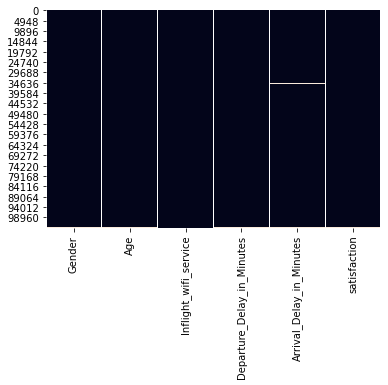

In [47]:
sns.heatmap(airline_new_df.isnull(), cbar=False)

In [51]:
airline_cleaned_df = airline_new_df.dropna(subset=['Arrival_Delay_in_Minutes'])

In [52]:
airline_cleaned_df.shape

(103594, 6)

In [53]:
airline_cleaned_df.isnull().any()

Gender                        False
Age                           False
Inflight_wifi_service         False
Departure_Delay_in_Minutes    False
Arrival_Delay_in_Minutes      False
satisfaction                  False
dtype: bool

Now data is cleaned and there in no missing values in columns. 

We have some feature variables that needs to be converted into numeric so that the machine learning algorithms can process the features well.
Since machine learning algorithms need only numerical data and here we're focusing on gender, type of travel, Inflight wifi service, Food and drink, Departure Delay in Minutes, Arrival Delay in Minutes out of which Inflight wifi service is an integer type, Gender, Type of travel and target variable satisfaction are of object types. Even though Inflight wifi service is of type int, since it represents categorical data, Inflight wifi service along with gender, Type of travel and target variable satisfaction need transformations. So, using dummification, we create dummy variables for Inflight wifi service, gender, Type of travel and target variable satisfaction columns using sklearn library.

For this, we see the distinct categories in each column and we create new columns for each of these distinct categories and add value 1 in the category column for which it indicates true or else 0. 'get_dummies' function converts categorical variable into dummy/indicator variables. "pd.get_dummies" creates a new dataframe which will have '1' and '0'. We will see that below

In [55]:
airline_cleaned_df['Arrival_Delay_in_Minutes'].isna().sum()

0

In [56]:
airline_cleaned_df.groupby('satisfaction').mean()

,Age,Inflight_wifi_service,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
satisfaction,,,,
neutral or dissatisfied,37.569126,2.399748,16.431913,17.127536
satisfied,41.748558,3.161191,12.546362,12.630799


Passengers with mean age of 37.5 have higher neutral or dissatisfaction with the airlines than passengers with mean age higher than 41 are satisfied with airline services. Thus age affects the satisfaction rate. 

In [57]:
airline_cleaned_df.groupby('Gender').size()

Gender
Female    52576
Male      51018
dtype: int64

Males are more than females

In [58]:
airline_cleaned_df.groupby('satisfaction').count()

,Gender,Age,Inflight_wifi_service,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
satisfaction,,,,,
neutral or dissatisfied,58697,58697,58697,58697,58697
satisfied,44897,44897,44897,44897,44897


58697 people have neutral or dissatisfied airline services experience while 44897 people are satisfied with airline services. Thus less people are satisfied and more have either neutral or dissatisfied experiences.

In [59]:
airline_cleaned_df.groupby('Inflight_wifi_service').mean()
airline_cleaned_df.groupby('Inflight_wifi_service').size()

,Age,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Inflight_wifi_service,,,
0,37.839470,10.766473,10.842700
1,39.718857,15.693887,16.206231
2,39.052262,15.522695,16.036808
3,39.119276,15.688433,16.193338
4,39.496935,13.606982,14.015808
5,40.398653,12.458464,12.541098


Inflight_wifi_service
0     3096
1    17781
2    25755
3    25789
4    19737
5    11436
dtype: int64

In [25]:
#

<ipython-input-60-5f331c4dec1c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  airline_cleaned_df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Inflight_wifi_service'}>],
       [<AxesSubplot:title={'center':'Departure_Delay_in_Minutes'}>,
        <AxesSubplot:title={'center':'Arrival_Delay_in_Minutes'}>]],
      dtype=object)

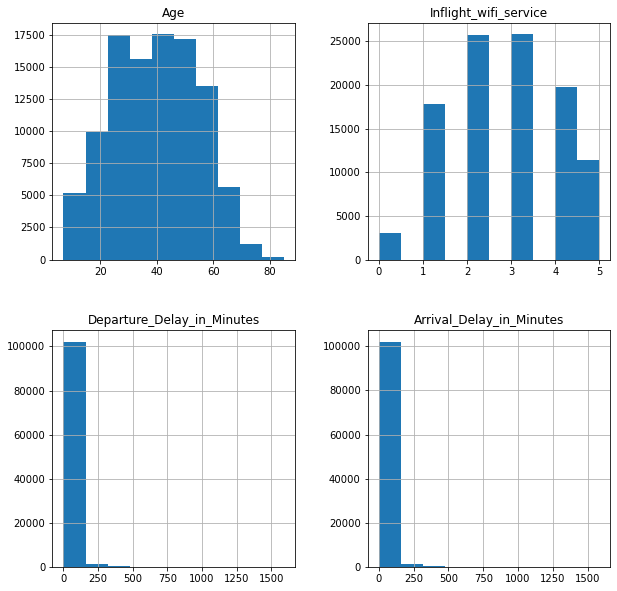

In [60]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
airline_cleaned_df.hist(ax=ax)
plt.show()

This is separate from the ipykernel package so we can avoid doing imports until

In [61]:
airline_df.corr()

,id,Age,Flight_Distance,Inflight_wifi_service,Food_and_drink,Online_boarding,Inflight_entertainment,On-board_service,Baggage_handling,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
id,1.000000,0.022857,0.095544,-0.021276,0.001063,0.055477,0.002300,0.055241,0.074940,0.079346,0.024965,-0.019546,-0.037254
Age,0.022857,1.000000,0.099461,0.017859,0.023000,0.208939,0.076444,0.057594,-0.047529,-0.049427,0.053611,-0.010152,-0.012147
Flight_Distance,0.095544,0.099461,1.000000,0.007131,0.056994,0.214869,0.128740,0.109526,0.063184,0.057540,0.093149,0.002158,-0.002426
Inflight_wifi_service,-0.021276,0.017859,0.007131,1.000000,0.134718,0.456970,0.209321,0.121500,0.120923,0.110441,0.132698,-0.017402,-0.019095
Food_and_drink,0.001063,0.023000,0.056994,0.134718,1.000000,0.234468,0.622512,0.059073,0.034746,0.033993,0.657760,-0.029926,-0.032524
Online_boarding,0.055477,0.208939,0.214869,0.456970,0.234468,1.000000,0.285066,0.155443,0.083280,0.074573,0.331517,-0.018982,-0.021949
Inflight_entertainment,0.002300,0.076444,0.128740,0.209321,0.622512,0.285066,1.000000,0.420153,0.378210,0.404855,0.691815,-0.027489,-0.030703
On-board_service,0.055241,0.057594,0.109526,0.121500,0.059073,0.155443,0.420153,1.000000,0.519134,0.550782,0.123220,-0.031569,-0.035227
Baggage_handling,0.074940,-0.047529,0.063184,0.120923,0.034746,0.083280,0.378210,0.519134,1.000000,0.628561,0.095793,-0.005573,-0.008542
Inflight_service,0.079346,-0.049427,0.057540,0.110441,0.033993,0.074573,0.404855,0.550782,0.628561,1.000000,0.088779,-0.054813,-0.059196


In [62]:
airline_cleaned_df.corr()

,Age,Inflight_wifi_service,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,0.017470,-0.010150,-0.012147
Inflight_wifi_service,0.017470,1.000000,-0.017451,-0.019095
Departure_Delay_in_Minutes,-0.010150,-0.017451,1.000000,0.965481
Arrival_Delay_in_Minutes,-0.012147,-0.019095,0.965481,1.000000


As we see, Departure Delay in Minutes and Arrival Delay in Minutes are correlated with each other. More closer to 1, more stronger relationship it has. 

In [110]:
airline_predict_df = pd.get_dummies(data = airline_cleaned_df, columns = ['Gender','Inflight_wifi_service','satisfaction'])
airline_predict_df.head()

,Age,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Inflight_wifi_service_0,Inflight_wifi_service_1,Inflight_wifi_service_2,Inflight_wifi_service_3,Inflight_wifi_service_4,Inflight_wifi_service_5,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13.0,25.0,18.0,0,1,0,0,0,1,0,0,1,0
1,25.0,1.0,6.0,0,1,0,0,0,1,0,0,1,0
2,26.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1
3,25.0,11.0,9.0,1,0,0,0,1,0,0,0,1,0
4,61.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1


In [111]:
airline_predict_df = airline_predict_df.drop(['Gender_Female','Inflight_wifi_service_0','Inflight_wifi_service_1','Inflight_wifi_service_2'], axis = 1)

In [112]:
airline_predict_df
airline_predict_df.info()
airline_predict_df.shape

,Age,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Male,Inflight_wifi_service_3,Inflight_wifi_service_4,Inflight_wifi_service_5,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13.0,25.0,18.0,1,1,0,0,1,0
1,25.0,1.0,6.0,1,1,0,0,1,0
2,26.0,0.0,0.0,0,0,0,0,0,1
3,25.0,11.0,9.0,0,0,0,0,1,0
4,61.0,0.0,0.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
103899,23.0,3.0,0.0,0,0,0,0,1,0
103900,49.0,0.0,0.0,1,0,1,0,0,1
103901,30.0,7.0,14.0,1,0,0,0,1,0
103902,22.0,0.0,0.0,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Age                                   103594 non-null  float64
 1   Departure_Delay_in_Minutes            103594 non-null  float64
 2   Arrival_Delay_in_Minutes              103594 non-null  float64
 3   Gender_Male                           103594 non-null  uint8  
 4   Inflight_wifi_service_3               103594 non-null  uint8  
 5   Inflight_wifi_service_4               103594 non-null  uint8  
 6   Inflight_wifi_service_5               103594 non-null  uint8  
 7   satisfaction_neutral or dissatisfied  103594 non-null  uint8  
 8   satisfaction_satisfied                103594 non-null  uint8  
dtypes: float64(3), uint8(6)
memory usage: 3.8 MB


(103594, 9)

In [88]:
airline_x_df = airline_predict_df[['Age','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Gender_Female','Gender_Male',
                                   'Inflight_wifi_service_3','Inflight_wifi_service_4','Inflight_wifi_service_5']]
airline_y_df = airline_predict_df['satisfaction_satisfied']

In [89]:
airline_x_df.shape
airline_y_df.shape

(103594, 8)

(103594,)

We have splitted our data into an x-dataframe (which contains the data that we will use to make predictions) and a y-dataframe (which contains the data that we are trying to predict.
Scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we’ll need to import the function train_test_split from the model_selection module of scikit-learn.
Since our target variable is categorical, we will be using Logistic Regression Model for prediction.
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (satisfaction) or 0 (dissatisfaction).

In [90]:
import numpy as np
from sklearn import metrics, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
log_reg = LogisticRegression(solver='liblinear')

In [97]:
X_train_df, X_test_df, Y_train_df, Y_test_df  = train_test_split(airline_x_df,airline_y_df, test_size = 0.20, random_state = 42)

X_train_df.shape, X_test_df.shape, Y_train_df.shape, Y_test_df.shape

((82875, 8), (20719, 8), (82875,), (20719,))

We have split dataset into 80% and 20% for train and test dataframes respectively

In [98]:
X_train_df.head()

,Age,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Inflight_wifi_service_3,Inflight_wifi_service_4,Inflight_wifi_service_5
18104,41.0,0.0,2.0,1,0,1,0,0
66524,19.0,0.0,0.0,1,0,0,0,1
63076,29.0,131.0,119.0,0,1,1,0,0
26315,52.0,10.0,10.0,0,1,0,1,0
65647,54.0,0.0,8.0,0,1,0,0,0


In [99]:
Y_train_df.head()

18104    1
66524    1
63076    1
26315    1
65647    1
Name: satisfaction_satisfied, dtype: uint8

In [101]:
Y_train_df.value_counts()

0    47042
1    35833
Name: satisfaction_satisfied, dtype: int64

In [102]:
Y_test_df.value_counts()

0    11655
1     9064
Name: satisfaction_satisfied, dtype: int64

In [103]:
airline_cleaned_df.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

We can observe that 58697 out of 103594(which constitues to 56%) records represent people have neutral or dissatisfied response towards airline services, while 44897 out of 103594(which constitues to 43%) records represent people have satisfied response towards airline services. 
Similarly from the train datasets, Y_train has a distribution of 47042 out of 82875(which constitues to 56%) records represent people have neutral or dissatisfied response towards airline services, while 35833 out of 82875((which constitues to 43%) records represent people have satisfied response towards airline services. Also, in Y_test has a distribution of 11655 out of 20719((which constitues to 56%)records for dissatisfaction and 9064 out of 20719((which constitues to 43%) records for satisfaction.
Hence we can say, the train and test datasets do represent overall data.In both train and test datasets, 0 represents
neutral or dissatisfied and 1 represents satisfaction.We have a balanced dataset.

In [104]:
log_reg = LogisticRegression().fit(X_train_df, Y_train_df )

In [105]:
train_y_df = (Y_train_df.values).reshape(-1,1)
train_y_df.shape

(82875, 1)

In [106]:
X_predict = log_reg.predict(X_train_df)
X_predict.shape

(82875,)

In [107]:
predict_X = X_predict.reshape(-1,1)
print(predict_X.shape)

(82875, 1)


In [108]:
train_y = (Y_train_df.values).reshape(-1,1)
print(train_y.shape)
print(train_y.size)

(82875, 1)
82875


In [119]:
# We need to obtain probabilities for our predictions. For this, we need to use predict_proba() function of the 
# logistic regression model we instantiated earlier during model training and predictions.
predicted_prob1 = log_reg.predict_proba(X_train_df)
print(predicted_probs1)

[[0.74354985 0.25645015]
 [0.0146957  0.9853043 ]
 [0.82969634 0.17030366]
 ...
 [0.70701142 0.29298858]
 [0.80238677 0.19761323]
 [0.00723828 0.99276172]]


In [120]:
predict_X[train_y == 1]

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [121]:
#Finally, we add all three variables into a Pandas Dataframe for display purposes. 

np.set_printoptions(suppress=True)  # this is to prevent small values being displayed in scientific notations

prob_res_df1 = pd.DataFrame(predicted_prob1)
prob_res_df1["Actual"] = train_y
prob_res_df1["Predicted"] = predict_X
prob_res_df1.head(10)

,0,1,Actual,Predicted
0,0.743550,0.256450,1,0
1,0.014696,0.985304,1,1
2,0.829696,0.170304,1,0
3,0.331313,0.668687,1,1
4,0.604067,0.395933,1,0
5,0.008236,0.991764,1,1
6,0.673452,0.326548,0,0
7,0.610126,0.389874,0,0
8,0.677104,0.322896,0,0
9,0.640600,0.359400,1,0


In [122]:
prob_res_df1.shape

(82875, 4)

The columns 0 and 1 represent preobablities of classifying satisfaction as 0 and 1. 4 out of 10 predicted and actual values didnt match, citing that model is performing more than an average accuracy level. We can actually say this on the basis of evaluation metrics.

Lets consider to look at these predicted values vs. actual y values and associated probabilities. We've already generated Y-predictions in the cell above. We need to generate probabilities and then combine the predicted values, actual values and probabilities in one dataframe for display purposes. Our resulting dataframe will have 82875 cases (corresponding to test data size of 82875 records) and four columns (probabilities, Y-actual values, and Y-predicted values. For these individual columns to be combined into one dataframe, each column must have a shape of (82875,4). So we may have to reshape some of these columns

In [123]:
from sklearn.metrics import classification_report
print(classification_report(Y_train_df, X_predict))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78     47042
           1       0.76      0.50      0.60     35833

    accuracy                           0.72     82875
   macro avg       0.73      0.69      0.69     82875
weighted avg       0.73      0.72      0.70     82875



In [124]:
print('Accuracy of logistic regression classifier on train set: {:.2f}%'.format(log_reg.score(X_train_df,Y_train_df)* 100, 2))

Accuracy of logistic regression classifier on train set: 71.59%


In [126]:
Y_predict = log_reg.predict(X_test_df)

In [127]:
Y_predict.shape

(20719,)

Let's consider to look at these predicted values vs. actual y values and associated probabilities.

We've already generated Y-predictions in the cell above. We need to generate probabilities and then combine the predicted values, actual values and probabilities in one dataframe for display purposes. Our resulting dataframe will have 20719 cases (corresponding to test data size of 20719 records) and four columns (probabilities, Y-actual values, and Y-predicted values. For these individual columns to be combined into one dataframe, each column must have a shape of (20719,1). So we may have to reshape some of these columns

In [131]:
predict_y = Y_predict.reshape(-1,1)
print(predict_y.shape)

(20719, 1)


In [132]:
test_y = (Y_test_df.values).reshape(-1,1)
print(test_y.shape)
print(test_y.size)

(20719, 1)
20719


In [128]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test_df, Y_test_df)* 100, 2))

Accuracy of logistic regression classifier on test set: 71.38


In [130]:
predicted_prob2 = log_reg.predict_proba(X_test_df)
print(predicted_prob2)

[[0.00535294 0.99464706]
 [0.74319636 0.25680364]
 [0.70871323 0.29128677]
 ...
 [0.59949621 0.40050379]
 [0.82974664 0.17025336]
 [0.30135177 0.69864823]]


In [134]:
np.set_printoptions(suppress=True)  # this is to prevent small values being displayed in scientific notations

prob_res_df2 = pd.DataFrame(predicted_prob2)
prob_res_df2["Actual"] = test_y
prob_res_df2["Predicted"] = predict_y
prob_res_df2.head(10)

,0,1,Actual,Predicted
0,0.005353,0.994647,1,1
1,0.743196,0.256804,0,0
2,0.708713,0.291287,0,0
3,0.735477,0.264523,0,0
4,0.415314,0.584686,1,1
5,0.674002,0.325998,1,0
6,0.368831,0.631169,1,1
7,0.813553,0.186447,0,0
8,0.772377,0.227623,0,0
9,0.461997,0.538003,1,1


Based on the train and test datasets, they have nearly same accuracy percentage of about 71.59% and 71.38%  respectively.But still, train dataset has slightly higher accuracy percentage than test dataset indicates that there are meaningful differences between the kind of data we trained the model on and the testing data we are providing for evaluation.Thus, our model gives a moderate prediction on the datasets. 